# New Section

In [ ]:
import pandas as pd
import sys
import numpy as np
from matplotlib import pyplot as plot
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Attention

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML_Assignments/output.txt", sep="|", header=None, names=["text", "rephrase"])
print(df.head())

# df2 = pd.read_csv("/content/drive/MyDrive/ML_Assignments/output.txt", sep="|", header=None, names=["text", "rephrase"])
# print(df.head())

# df = pd.concat([df1, df2], ignore_index=True)

                                                text  \
0  I need to get away from this city for a bit. I...   
1  Hate when people try to guilt trip you into so...   
2  Why does it have to be so hard to network if y...   
3  Children with autism use stereotypic behavior ...   
4  I have less than 2 hours to get home and make ...   

                                            rephrase  
0  I'm thankful for everything this city gave me!...  
1  I don’t like it when people try to guilt -trip...  
2  I'm glad networking with gaming comes very eas...  
3  Children with autism tend to demonstrate stere...  
4  I have less than 2 hours to get home and make ...  


In [ ]:
def convert_to_lower(value):
    if isinstance(value, str):
        return value.lower()
    return value

df = df.applymap(convert_to_lower)

In [ ]:
df.head()

,text,rephrase
0,i need to get away from this city for a bit. i...,i'm thankful for everything this city gave me!...
1,hate when people try to guilt trip you into so...,i don’t like it when people try to guilt -trip...
2,why does it have to be so hard to network if y...,i'm glad networking with gaming comes very eas...
3,children with autism use stereotypic behavior ...,children with autism tend to demonstrate stere...
4,i have less than 2 hours to get home and make ...,i have less than 2 hours to get home and make ...


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Download the NLTK stop words
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

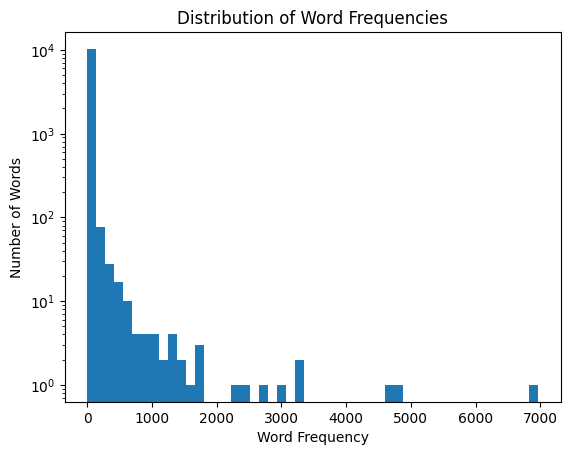

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Assuming 'text' is the column containing your text data
corpus = df['text'].tolist()

# Tokenize the text and create a list of all words
all_words = [word.lower() for text in corpus for word in word_tokenize(text)]

# Calculate word frequencies
word_counts = Counter(all_words)

# Plot histogram of word frequencies
plt.hist(list(word_counts.values()), bins=50, log=True)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Assuming 'text' is the column containing your text data
corpus = df['text'].tolist()

# Tokenize the text and create a list of all words
all_words = [word.lower() for text in corpus for word in word_tokenize(text)]

# Calculate word frequencies
word_counts = Counter(all_words)

# Set a frequency threshold (adjust as needed)
frequency_threshold = 500
common_words = [word for word, count in word_counts.items() if count > frequency_threshold]

# Remove common words from each document
df['filtered_text'] = df['text'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in common_words]))
df['filtered_rephrase'] = df['rephrase'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in common_words]))

# Display the DataFrame with the filtered text column
print(df[['text', 'filtered_text']])

                                                   text  \
0     i need to get away from this city for a bit. i...   
1     hate when people try to guilt trip you into so...   
2     why does it have to be so hard to network if y...   
3     children with autism use stereotypic behavior ...   
4     i have less than 2 hours to get home and make ...   
...                                                 ...   
6674  anybody would think i'm 13 again and going thr...   
6675  how come it seems the spring semester is harde...   
6676  the snow and ice is bringing out the crazy in ...   
6677  the amount of stuff i need to sort out before ...   
6678  ok.lets talk about thiswhat is gonna happen wi...   

                                          filtered_text  
0        away from city bit ca wait holidays over leave  
1     hate people try guilt trip into something told...  
2           why does hard network if are into gaming am  
3     children autism use stereotypic behavior or re...  
4

In [ ]:
df['text']=df['filtered_text']
df['rephrase']=df['filtered_rephrase']

In [ ]:
def process_text(text):
    # Remove punctuation
    translator = str.maketrans("", "", string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]

    return ' '.join(words)

# def process_text(text):
#     # Remove non-words and punctuation
#     text = re.sub(r'[^A-Za-z\s]', '', text)

#     return text.lower()  # Keep the text in lowercase

In [ ]:
# import re
# import string
# # Apply the function to the 'text' column
# df['text'] = df['text'].apply(process_text)

# df['rephrase'] = df['rephrase'].apply(process_text)

# # Display the updated DataFrame
# print(df.head(5))

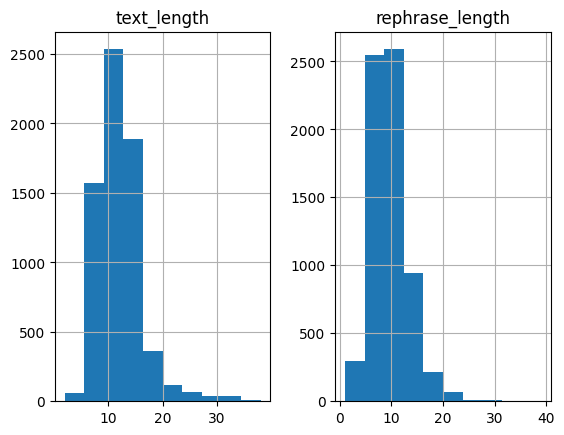

In [ ]:
def text_count():
    x_vocab = list()
    y_vocab = list()
    text_sent_length = []
    rephrase_sent_length = []
    x_word_set = []
    y_word_set = []
    for i in df['text']:

        text_sent_length.append(len(i.split()))
        x_word_set.extend(i.split())
    for j in df['rephrase']:
        rephrase_sent_length.append(len(j.split()))
        y_word_set.extend(j.split())
    #text_sent_length.hist()
    temp_df = pd.DataFrame({'text_length': text_sent_length, 'rephrase_length': rephrase_sent_length})
    temp_df.hist()
    plot.show()

    x_vocab = pd.Series(x_word_set).drop_duplicates().tolist()
    y_vocab = pd.Series(y_word_set).drop_duplicates().tolist()
    return x_vocab, y_vocab

x_vocab, y_vocab = text_count()


In [ ]:
x_vocab

['away',
 'from',
 'city',
 'bit',
 'ca',
 'wait',
 'holidays',
 'over',
 'leave',
 'hate',
 'people',
 'try',
 'guilt',
 'trip',
 'into',
 'something',
 'told',
 'them',
 'no',
 '5',
 'freaking',
 'times',
 'take',
 'hint',
 'why',
 'does',
 'hard',
 'network',
 'if',
 'are',
 'gaming',
 'am',
 'children',
 'autism',
 'use',
 'stereotypic',
 'behavior',
 'or',
 'repetitive',
 'behaviors',
 'they',
 'excited',
 'bored',
 'less',
 'than',
 '2',
 'hours',
 'home',
 'make',
 'mashed',
 'potatoes',
 'scratch',
 'one',
 'sees',
 'while',
 'because',
 "'ve",
 'climbed',
 'dark',
 'hole',
 'wan',
 'na',
 'found',
 'know',
 'what',
 'want',
 'happen',
 'would',
 'easy',
 'life',
 'frustrated',
 'few',
 'drinks',
 "'ll",
 'doing',
 'tonight',
 'will',
 'miracle',
 'mental',
 'breakdown',
 'before',
 'feeling',
 'where',
 'amount',
 'precious',
 'spent',
 'studying',
 'was',
 'worth',
 'upset',
 'right',
 'now',
 'havent',
 'liked',
 'anybodys',
 'post',
 'past',
 '24',
 'think',
 'run',
 'likes

In [ ]:
len(df)

max_text_length = 10
max_rephrase_length = 10

In [ ]:
def extract_subset():
    final_text = []
    final_rephrase = []

    for i in range(len(df)):
        if(len(df["text"][i].split())<=max_text_length and len(df["rephrase"][i].split())<=max_rephrase_length):
            final_text.append(df["text"][i])
            final_rephrase.append(df["rephrase"][i])
    final_df = pd.DataFrame({"text": final_text, "rephrase": final_rephrase})
    return final_df;

In [ ]:
df = extract_subset()

def appendTokens(df):
   df['rephrase'] = df['rephrase'].apply(lambda x : '<rbegin> '+ x + ' <rend>')
  #  df['text'] = df['text'].apply(lambda x : '<rbegin> '+ x + ' <rend>')
   return df

df = appendTokens(df)
print(df.head())

                                                text  \
0     away from city bit ca wait holidays over leave   
1        why does hard network if are into gaming am   
2             few drinks life what 'll doing tonight   
3       will miracle if mental breakdown before over   
4  feeling where amount precious spent studying w...   

                                            rephrase  
0  <rbegin> thankful everything city gave many me...  
1  <rbegin> glad networking gaming comes very eas...  
2  <rbegin> drinking great way cheer oneself card...  
3   <rbegin> will over soon will make through <rend>  
4  <rbegin> because spent long studying means wil...  


In [ ]:
y_vocabulary = 0
x_vocabulary = 0
x_train_pad_sequences = None
y_test_pad_sequences = None
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['rephrase'], test_size=0.2, random_state=76283)
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=76283)

x_tokenizer = Tokenizer(num_words=len(x_vocab))
x_tokenizer.fit_on_texts(x_train)
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(X_val)
x_test_sequence = x_tokenizer.texts_to_sequences(x_test)
x_train_pad_sequences = pad_sequences(x_train_sequence, maxlen = max_text_length , padding='post')
x_val_pad_sequences = pad_sequences(x_val_sequence, maxlen = max_text_length, padding='post')
x_test_pad_sequences = pad_sequences(x_test_sequence, maxlen = max_text_length, padding='post')
x_vocabulary = x_tokenizer.num_words + 1;

# Rephrase tokenizer
y_tokenizer = Tokenizer(num_words=len(y_vocab) )
y_tokenizer.fit_on_texts(list(y_train))
y_train_sequence = y_tokenizer.texts_to_sequences(y_train)
y_val_sequence = y_tokenizer.texts_to_sequences(y_val)
y_test_sequence = y_tokenizer.texts_to_sequences(y_test)
y_train_pad_sequences = pad_sequences(y_train_sequence, maxlen = max_rephrase_length , padding='post')
y_val_pad_sequences = pad_sequences(y_val_sequence, maxlen = max_rephrase_length , padding='post')
y_test_pad_sequences = pad_sequences(y_test_sequence, maxlen = max_rephrase_length, padding='post')
y_vocabulary = y_tokenizer.num_words + 1;
    #return (x_vocabulary, y_vocabulary, x_train_pad_sequences, y_train_pad_sequences, x_test_pad_sequences, y_test_pad_sequences)

In [ ]:
y_vocabulary

6299

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 100)           1038900   
                                                                 
 bidirectional_4 (Bidirecti  (None, 10, 32)            14976     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 10, 32)            0         
                                                                 
 dense_4 (Dense)             (None, 10, 6299)          207867    
                                                                 
Total params: 1261743 (4.81 MB)
Trainable params: 1261743 (4.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


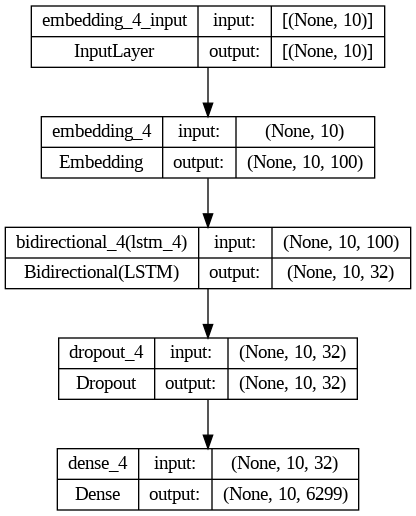

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding
import tensorflow.keras.utils
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have tokenized and padded sequences
# x_train_pad_sequences and y_train_pad_sequences are your input and target sequences

embedding_dim = 100
latent_dim = 100  # Adjust based on your preference

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=x_vocabulary, output_dim=embedding_dim, input_length=max_text_length))

# Bidirectional LSTM layer for the input sequence
model.add(Bidirectional(LSTM(16, return_sequences=True, recurrent_dropout=0.1, unroll=True)))

# Additional LSTM layer (customize as needed)
#model.add(LSTM(16, return_sequences = True, unroll=True))

model.add(layers.Dropout(0.1))

# Dense layer for output
model.add(Dense(y_vocabulary, activation='softmax'))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()
keras.utils.plot_model(model, "OutputModel.png", show_shapes = True)

In [ ]:
# Example training setup
epochs = 50
batch_size = 128

# Train the model
history = model.fit(x_train_pad_sequences,
          y_train_pad_sequences,
          epochs=epochs,
          batch_size=batch_size,
          validation_data = (x_val_pad_sequences, y_val_pad_sequences),
          )

Epoch 1/50
18/18 [==============================] - 15s 436ms/step - loss: 6.8848 - accuracy: 0.1166 - val_loss: 5.1346 - val_accuracy: 0.1645
Epoch 2/50
18/18 [==============================] - 3s 137ms/step - loss: 5.6095 - accuracy: 0.1617 - val_loss: 4.8708 - val_accuracy: 0.2634
Epoch 3/50
18/18 [==============================] - 2s 99ms/step - loss: 5.2611 - accuracy: 0.1780 - val_loss: 4.8386 - val_accuracy: 0.2612
Epoch 4/50
18/18 [==============================] - 1s 68ms/step - loss: 5.0469 - accuracy: 0.1874 - val_loss: 4.8815 - val_accuracy: 0.2604
Epoch 5/50
18/18 [==============================] - 1s 76ms/step - loss: 4.8706 - accuracy: 0.1991 - val_loss: 4.9555 - val_accuracy: 0.2282
Epoch 6/50
18/18 [==============================] - 1s 57ms/step - loss: 4.7004 - accuracy: 0.2093 - val_loss: 4.9956 - val_accuracy: 0.2325
Epoch 7/50
18/18 [==============================] - 1s 57ms/step - loss: 4.5389 - accuracy: 0.2256 - val_loss: 5.1039 - val_accuracy: 0.2255
Epoch 8/50

In [ ]:
model.evaluate(x_test_pad_sequences, y_test_pad_sequences)

12/12 [==============================] - 0s 17ms/step - loss: 7.4564 - accuracy: 0.1770


[7.456370830535889, 0.17702703177928925]

In [ ]:
def plot_loss(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(loss) + 1)

  plot.figure()
  plot.plot(epochs, loss, "bo", label="Training Loss")
  plot.plot(epochs, val_loss, "b", label="Val Loss")
  plot.title("Train vs Validation")
  plot.legend()
  plot.show()

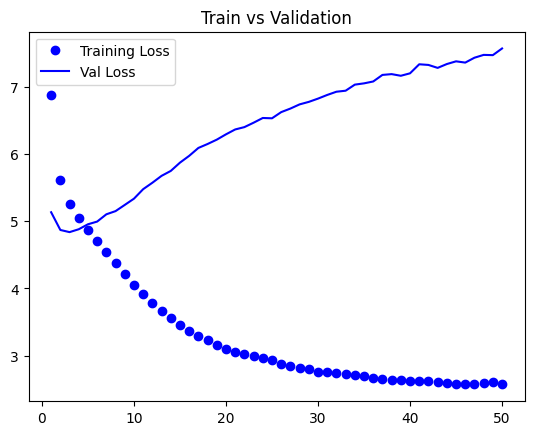

In [ ]:
plot_loss(history)

In [ ]:
predictions = model.predict(x_test_pad_sequences)

12/12 [==============================] - 1s 7ms/step


In [ ]:
predicted_indices = np.argmax(predictions, axis=-1)

In [ ]:
x_test_pad_sequences[0]

array([218,  30,  28, 719,  19, 267,   0,   0,   0,   0], dtype=int32)

In [ ]:
final = []  # Initialize an empty list to store sequences of predicted token indices
pred = predictions

# Special tokens to ignore
special_tokens = {'rend', 'rbegin'}

for val in pred:
    pred_tokens = []
    for i in val:
        predicted_token = y_tokenizer.index_word.get(np.argmax(i) + 1, '')  # Get the predicted token or an empty string
        if predicted_token not in special_tokens:
            pred_tokens.append(predicted_token)
    final.append(pred_tokens)

print(final)

[['homework', 'today', 'finish', 'now', 'sure', 'was', 'will', 'will', 'will', 'will'], ['concert', 'close', 'money', 'feelings', 'will', 'will'], ['really', 'am', 'days', 'know', 'right'], ["'ve", 'where', 'some', 'chores', 'will', 'will', 'will', 'will', 'will'], ['behind', 'talking', 'accumulated', 'had', 'learned', 'ca', 'off', 'am', 'will'], ['rest', 'enjoy', 'around', 'will', 'feel', 'will', 'will'], ['personal', 'worked', 'stress', 'calm', 'maybe', 'am', 'will', 'will'], ['start', 'insomnia', 'handle', 'will', 'will'], ['better', 'ca', 'will', 'talk', 'will', 'funny', 'will'], ["'ll", 'still', 'will', 'tuesday', 'more', 'done', 'will'], ['break', 'hang', 'birthday', 'least', 'end', 'through', 'will', 'will', 'will'], ['prom', 'life', 'focus', 'will'], ['think', 'sleep', 'will', 'will', 'failure', 'means', 'will', 'will', 'could'], ['homework', 'want', 'there', 'night', 'end', 'classes', 'will', 'will', 'will'], ['teacher', 'was', 'tough', 'lot', 'rest', "'ve", 'some', 'will', 'w

In [ ]:
for i in final:
    print(i)

['homework', 'today', 'finish', 'now', 'sure', 'was', 'will', 'will', 'will', 'will']
['concert', 'close', 'money', 'feelings', 'will', 'will']
['really', 'am', 'days', 'know', 'right']
["'ve", 'where', 'some', 'chores', 'will', 'will', 'will', 'will', 'will']
['behind', 'talking', 'accumulated', 'had', 'learned', 'ca', 'off', 'am', 'will']
['rest', 'enjoy', 'around', 'will', 'feel', 'will', 'will']
['personal', 'worked', 'stress', 'calm', 'maybe', 'am', 'will', 'will']
['start', 'insomnia', 'handle', 'will', 'will']
['better', 'ca', 'will', 'talk', 'will', 'funny', 'will']
["'ll", 'still', 'will', 'tuesday', 'more', 'done', 'will']
['break', 'hang', 'birthday', 'least', 'end', 'through', 'will', 'will', 'will']
['prom', 'life', 'focus', 'will']
['think', 'sleep', 'will', 'will', 'failure', 'means', 'will', 'will', 'could']
['homework', 'want', 'there', 'night', 'end', 'classes', 'will', 'will', 'will']
['teacher', 'was', 'tough', 'lot', 'rest', "'ve", 'some', 'will', 'will']
['tomorro

In [ ]:
sentences = [' '.join(words) for words in final]

# Convert to a pandas Series
sentence_series = pd.Series(sentences)

# Print the pandas Series
print(sentence_series)

0      homework today finish now sure was will will w...
1                 concert close money feelings will will
2                              really am days know right
3         've where some chores will will will will will
4      behind talking accumulated had learned ca off ...
                             ...                        
365    totally schedule soon today will will skin wil...
366                         from from far will will will
367                                     myself will will
368            right 'll better hope will will will will
369    tests missed fun weekend craving busy 'll wors...
Length: 370, dtype: object


In [ ]:
x_test[0:10]

1777    fail algebra quiz tomorrow no doubt about conf...
118      too young die heart attackbut game driving point
1695             ugh long night no reason sad wtf wrong (
843     help stress reliever during does involve chain...
1110    dont fucking bitches think cute act dumb no gt...
179     should really leaving cant even outta bed / ex...
308     woke middle low grade frver cough am missing v...
1351               go upstairs study follow continue talk
996     why does biggest football game year always inv...
435       mood anything every little thing stressing sick
Name: text, dtype: object

In [ ]:
len(sentence_series)

619

In [ ]:
len(x_test)

619

In [ ]:
x_test[0:10]

1777    fail algebra quiz tomorrow no doubt about conf...
118      too young die heart attackbut game driving point
1695             ugh long night no reason sad wtf wrong (
843     help stress reliever during does involve chain...
1110    dont fucking bitches think cute act dumb no gt...
179     should really leaving cant even outta bed / ex...
308     woke middle low grade frver cough am missing v...
1351               go upstairs study follow continue talk
996     why does biggest football game year always inv...
435       mood anything every little thing stressing sick
Name: text, dtype: object

In [ ]:
type(x_test)

pandas.core.series.Series

In [ ]:
type(sentences)

list

In [ ]:
 # Open a file in write mode
with open('x_test_samples.txt', 'w') as file:
    # Iterate over the first five items in x_test
    for sentence in x_test[:10]:
        # Convert sequence indices to the original sentence

        # Write the sentence to the file
        file.write(sentence + '\n')

print("First five items from x_test have been written to x_test_samples.txt.")

First five items from x_test have been written to x_test_samples.txt.


In [ ]:
x_test_pad_sequences[0]

array([218,  30,  28, 719,  19, 267,   0,   0,   0,   0], dtype=int32)

In [ ]:
# for seq_indices in x_test_pad_sequences[:10]:
#     # Convert sequence indices to the original sentence
#     sentence = ' '.join([x_tokenizer.index_word[idx] for idx in seq_indices if idx != 0])

#     # Print or use the sentences as needed
#     print(sentence)

fail tomorrow no doubt about confused
too die heart game point
ugh long night no reason sad wtf wrong
help stress during does smoking
dont fucking think cute act dumb no now
should really leaving cant even outta bed exhausted
woke middle low grade cough am missing worry
go study continue talk
why does biggest football game year always
mood anything every little thing stressing sick


In [ ]:
x_test[0:5]

1777    fail algebra quiz tomorrow no doubt about conf...
118      too young die heart attackbut game driving point
1695             ugh long night no reason sad wtf wrong (
843     help stress reliever during does involve chain...
1110    dont fucking bitches think cute act dumb no gt...
Name: text, dtype: object

In [ ]:
for i in final:
    print(i)

['good', 'get', 'able', 'though', 'think', 'time', 'hope']
['fewer', '21st', 'want', 'look', 'im', 'much', 'im']
['somehow', 'shouldnt', 'hospital', 'im', 'week', 'need', 'support', 'im', 'im']
['work', 'work', 'im', 'im']
['get', 'hours', 'need', 'get', 'really', 'need', 'im', 'shouldnt']
['good', 'mom', 'hard', 'today', 'im', 'week', 'im']
['get', 'focus', 'hope', 'exam']
['im', 'need', 'soon', 'im']
['fan', 'worse', 'hard', 'sure', 'im', 'im']
['relieve', 'got', 'finish', 'keeping', 'minimizing', 'time', 'im']
['time', 'day', 'long', 'hope']
['though', 'place', 'work', 'excited', 'school', 'im']
['comes', 'sick', 'im', 'im']
['soon', 'work', 'time', 'game']
['lit', 'lie', 'cant', 'challenging', 'lot', 'im', 'im', 'im']
['something', 'hope', 'run', 'soon', 'starting', 'today', 'im']
['brits', 'time', 'attempting', 'things', 'im', 'week', 'im', 'im']
['things', 'job', 'sure', 'work', 'time']
['help', 'today', 'tomorrow’s', 'weather', 'fear', 'im']
['sleep', 'get', 'moment', 'im', 'im'

In [ ]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
bleu_scores = []

for idx, candidate_words in sentence_series.items():
    reference_words = y_test.iloc[idx]
    bleu_score = sentence_bleu([reference_words], candidate_words.split())
    bleu_scores.append(bleu_score)

# Print BLEU scores
for idx, bleu_score in enumerate(bleu_scores):
    print(f"BLEU Score for example {idx + 1}: {bleu_score}")

# Optionally, you can compute the average BLEU score
average_bleu_score = np.mean(bleu_scores)
print(f"Average BLEU Score: {average_bleu_score}")

BLEU Score for example 1: 0
BLEU Score for example 2: 0
BLEU Score for example 3: 0
BLEU Score for example 4: 0
BLEU Score for example 5: 0
BLEU Score for example 6: 0
BLEU Score for example 7: 0
BLEU Score for example 8: 0
BLEU Score for example 9: 0
BLEU Score for example 10: 0
BLEU Score for example 11: 0
BLEU Score for example 12: 0
BLEU Score for example 13: 0
BLEU Score for example 14: 0
BLEU Score for example 15: 0
BLEU Score for example 16: 0
BLEU Score for example 17: 0
BLEU Score for example 18: 0
BLEU Score for example 19: 0
BLEU Score for example 20: 0
BLEU Score for example 21: 0
BLEU Score for example 22: 0
BLEU Score for example 23: 0
BLEU Score for example 24: 0
BLEU Score for example 25: 0
BLEU Score for example 26: 0
BLEU Score for example 27: 0
BLEU Score for example 28: 0
BLEU Score for example 29: 0
BLEU Score for example 30: 0
BLEU Score for example 31: 0
BLEU Score for example 32: 0
BLEU Score for example 33: 0
BLEU Score for example 34: 0
BLEU Score for example 

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
pip install rouge-score

In [ ]:
from rouge_score import rouge_scorer

# Assuming y_test is a pandas Series and sentence_series is another pandas Series
# Make sure the indices align between y_test and sentence_series

# Calculate ROUGE scores for each pair of reference and candidate sentences
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

for idx, candidate_words in sentence_series.items():
    reference_words = y_test.iloc[idx]  # Assuming y_test is a pandas Series
    scores = scorer.score(' '.join(candidate_words.split()), ' '.join(reference_words.split()))

    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Print ROUGE scores
for idx, (rouge1, rouge2, rougeL) in enumerate(zip(rouge1_scores, rouge2_scores, rougeL_scores)):
    print(f"ROUGE-1 Score for example {idx + 1}: {rouge1}")
    print(f"ROUGE-2 Score for example {idx + 1}: {rouge2}")
    print(f"ROUGE-L Score for example {idx + 1}: {rougeL}")

# Optionally, you can compute the average ROUGE scores
average_rouge1_score = np.mean(rouge1_scores)
average_rouge2_score = np.mean(rouge2_scores)
average_rougeL_score = np.mean(rougeL_scores)

print(f"Average ROUGE-1 Score: {average_rouge1_score}")
print(f"Average ROUGE-2 Score: {average_rouge2_score}")
print(f"Average ROUGE-L Score: {average_rougeL_score}")

ROUGE-1 Score for example 1: 0.0
ROUGE-2 Score for example 1: 0.0
ROUGE-L Score for example 1: 0.0
ROUGE-1 Score for example 2: 0.0
ROUGE-2 Score for example 2: 0.0
ROUGE-L Score for example 2: 0.0
ROUGE-1 Score for example 3: 0.13333333333333333
ROUGE-2 Score for example 3: 0.0
ROUGE-L Score for example 3: 0.13333333333333333
ROUGE-1 Score for example 4: 0.0
ROUGE-2 Score for example 4: 0.0
ROUGE-L Score for example 4: 0.0
ROUGE-1 Score for example 5: 0.0
ROUGE-2 Score for example 5: 0.0
ROUGE-L Score for example 5: 0.0
ROUGE-1 Score for example 6: 0.0
ROUGE-2 Score for example 6: 0.0
ROUGE-L Score for example 6: 0.0
ROUGE-1 Score for example 7: 0.10526315789473685
ROUGE-2 Score for example 7: 0.0
ROUGE-L Score for example 7: 0.10526315789473685
ROUGE-1 Score for example 8: 0.0
ROUGE-2 Score for example 8: 0.0
ROUGE-L Score for example 8: 0.0
ROUGE-1 Score for example 9: 0.0
ROUGE-2 Score for example 9: 0.0
ROUGE-L Score for example 9: 0.0
ROUGE-1 Score for example 10: 0.0
ROUGE-2 Sco